# Systems of linear equations
The solution of a system of linear equations $Ax=b$ is obtained as

In [1]:
import numpy as np

A = np.array([[1, 2], [3, -1]])
b = np.array([-1, 4])

In [2]:
x = np.linalg.solve(A,b)
print(x)

[ 1. -1.]


To check that this really is a solution, you should always compute the residual, which should vanish (to machine precision):

In [3]:
r = A.dot(x)-b
print(r)

[4.4408921e-16 0.0000000e+00]


The same solution is obtained using the command

In [4]:
x = np.linalg.inv(A).dot(b)
print(x)

[ 1. -1.]


The difference is that this requires computing the inverse of $A$, which is time consuming, whereas `solve(A,b)` applies a fast algorithm for solving linear equations, which does not require the inverse explicitly. This becomes relevant for large systems:

In [5]:
import timeit
print(timeit.timeit(stmt='np.linalg.solve(A,b)',setup='import numpy as np; A = np.random.rand(1000,1000); b = np.random.rand(1000,1)',number=100))
print(timeit.timeit(stmt='np.linalg.inv(A).dot(b)',setup='import numpy as np; A = np.random.rand(1000,1000); b = np.random.rand(1000,1)',number=100))

1.017898826
3.2304942210000003


You can either use `linalg.inv()` and `linalg.dot()` methods in chain to solve a system of linear equations, or you can simply use the `solve()` method. The `solve()` method is the preferred way.

## Overdetermined systems
A system of linear equations is considered overdetermined if there are more equations than unknowns. For example, we have the overdetermined system

$$x_1 + x_2 =2 \\
x_1 = 1\\
x_2 = 0$$

In practice, we have a system $Ax=b$ where $A$ is a $m$ by $n$ matrix and $b$ is a $m$ dimensional vector, but $m$ is greater than $n$. In this case, the vector $b$ cannot be expressed as a linear combination of the columns of $A$. Hence, we can't find $x$ so that satisfies the problem $Ax=b$ (except in specific cases) but it is possible to determine $x$ so that $Ax$ is as close to $b$ as possible. So we wish to find $x$ which minimizes  $\begin{Vmatrix}Ax-b\end{Vmatrix}$. Considering the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of $A$, we have that $Ax=b$ becomes $QRx=b$. Multiplying by $Q^T$ we obtain $Q^TQRx=Q^Tb$, and since $Q^T$ is orthogonal (this means that Q^T*Q=I) we have $Rx=Q^Tb$.

Now, this is a well defined system, $R$ is an upper triangular matrix and $Q^T*b$ is a vector. More precisely $b$ is the orthogonal projection of $b$ onto the range of $A$ and $\begin{Vmatrix}Ax-b\end{Vmatrix}=\begin{Vmatrix}Rx-Q^Tb\end{Vmatrix}$.

The function `linalg.lstsq()` provided by numpy returns the least-squares solution to a linear system equation and is able to solve overdetermined systems. Let's compare the solutions of `linalg.lstsq()` with the ones computed using the QR decomposition:

In [6]:
A = np.array([[1, 1], [1, 0],[0, 1]])
b = np.array([2, 1, 0])
x = np.linalg.lstsq(A,b,rcond=None)[0]
print(x)

[1.33333333 0.33333333]


In [7]:
Q,R = np.linalg.qr(A) # qr decomposition of A
Qb = np.dot(Q.T,b) # computing Q^T*b (project b onto the range of A)
x = np.linalg.solve(R,Qb) # solving R*x = Q^T*b
print(x)

[1.33333333 0.33333333]


As we can see, the solutions are the same.

This is the vector for which the norm of the residual $\begin{Vmatrix}r\end{Vmatrix}$ becomes minimal:

In [8]:
r =  A.dot(x)-b
print(r)
np.linalg.norm(r)

[-0.33333333  0.33333333  0.33333333]


0.5773502691896257

An even simpler example $x=0$, $x=1$. Here the norm of the residual $\begin{Vmatrix}Ax-b\end{Vmatrix}$ is

$$\begin{Vmatrix}r\end{Vmatrix}=\sqrt{x^2+(x-1)^2}$$

and minimising this function (by finding the zero of the derivative) yields $x=1/2$. This is indeed what numpy returns:

In [9]:
A = np.array([[1], [1]]);
b = np.array([0, 1]);
x = np.linalg.lstsq(A,b,rcond=None)[0]
print(x)

[0.5]


## Underdetermined systems
As an example consider
$$x_1 + 2 x_2 + 3 x_3 + 4 x_4  = 1\\
5 x_1 + 6 x_2 + 7 x_3 + 8 x_4 = 2$$
This has an infinite number of solutions. `lstsq` returns one solution:

In [10]:
A = np.array([[1,2,3,4],[5,6,7,8]])
b = np.array([1,2])
x = np.linalg.lstsq(A,b,rcond=None)[0]
print(x)

[-0.05   0.025  0.1    0.175]


Using `scipy.optimize.nnls`, a non-negative least squares solver. Solve $argmin_x \begin{Vmatrix}Ax - b\end{Vmatrix}_2$ for $x\ge0$, returns a solution with as many components as possible equal to zero. 

In [11]:
from scipy.optimize import nnls 
x, rnorm = nnls(A,b)
print(x)
print(rnorm)

[1.65502277e-16 0.00000000e+00 0.00000000e+00 2.50000000e-01]
0.0


To find all solutions, we need to determine the kernel of $A$. The nullspace or kernel of a matrix $A$ (denoted $\ker A$) is the set of all vectors $x$, for which $Ax=0$. If $x$ and $y$ are in the nullspace, then $c_1x+c_2y$ is also in the nullspace as 

$$A(c_1x+c_2y)=c_1(Ax)+c_2(Ay)=0+0=0$$

The nullspace is a vector space. When $A$ is viewed as a linear transformation, the nullspace is the subspace of $\mathcal{R}^n$ that is sent to 0 under the map $A$, hence the term "fundamental subspace."

An orthonormal basis $N=(n_1,\dots,n_k)$ of the kernel is returned by

In [12]:
from scipy.linalg import null_space, orth
N = null_space(A)
print(N)

[[-0.40008743 -0.37407225]
 [ 0.25463292  0.79697056]
 [ 0.69099646 -0.47172438]
 [-0.54554195  0.04882607]]


The nullspace consists of all vectors $x$ such that $Ax=0$. This defines a system of linear equations that can be solved to give the family of solutions

$$$$

In [13]:
n0=N[:,0]
n1=N[:,1]
assert (abs(A.dot(n0))<=1e-14).all(), "Ax=0 for all x in nullspace {}".format(A.dot(n1))
assert (abs(A.dot(n1))<=1e-14).all(), "Ax=0 for all x in nullspace {}".format(A.dot(n1))

which defines a vector space with basis $\{n_0,n_1\}$. As there are two vectors in this basis, the dimension of the nullspace is 2.

So to determine the solutions of a general system of linear equations, we need to do the following:
1. Compute $x = A\b$
2. Check the residual $r = A*x - b$
3. If $r$ is nonzero then there is no solution.
4. If $r$ is zero, compute the kernel $N = null(A)$
5. If $N$ is empty then $x$ is the unique solution.
6. If $N$ is not empty then there is an infinite number of solutions obtained by adding an arbitrary linear combination of the columns of $N$ to $x$, as in the example above.

In [14]:
# example fundamental subspaces
A = np.array([[1,2,3,3],[2,0,6,2],[3,4,9,7]])
# column/row space (image)
print('column space: {}'.format(orth(A)))
print('row space: {}'.format(orth(A.T)))
# nullspace/ left nullspace (kernel)
print('nullspace: {}'.format(null_space(A)))
print('left nullspace: {}'.format(null_space(A.T)))
assert (abs(A.dot(null_space(A)))<=1e-14).all(), "Ax=0 for all x in nullspace {}".format(A.dot(null_space(A)))
# Fundamental Theorem of Linear Algebra: rank-nullity theorem (relates the dimensions of the four fundamental subspaces)
assert np.linalg.matrix_rank(A)==len(orth(A)[0])==len(orth(A.T)[0]), "The column and row spaces of an m×n matrix A both have dimension r, the rank of the matrix."
assert A.shape[1]-np.linalg.matrix_rank(A)==len(null_space(A)[1]), "The nullspace has dimension n−r."
assert A.shape[0]-np.linalg.matrix_rank(A.T)==len(null_space(A.T)[1]), "The left nullspace has dimension m−r."
# Fundamental Theorem of Linear Algebra: orthogonal spaces (the dot product v⋅w is 0)
assert (abs(null_space(A).T.dot(orth(A.T)))<=1e-14).all(), "The nullspace and row space are orthogonal."
assert (abs(null_space(A.T).T.dot(orth(A)))<=1e-14).all(), "The left nullspace and the column space are also orthogonal."
# Fundamental Theorem of Linear Algebra:  orthonormal basis (singular value decomposition)
[U,s,V]=np.linalg.svd(A)
S = np.zeros(A.shape, dtype=complex)
S[:(A.shape[0]), :(A.shape[0])] = np.diag(s)
assert np.allclose(A, np.dot(U, np.dot(S, V))), "any matrix M can be written as dot product of an m x m unitary martix, an m x n matrix with nonnegative values in diagonal, and an b x n unitary matrix."

column space: [[-0.31994238 -0.36841839]
 [-0.41936816  0.88119879]
 [-0.84956884 -0.29623738]]
row space: [[-0.25358142  0.17588223]
 [-0.27620609 -0.66896915]
 [-0.76074427  0.52764668]
 [-0.52978752 -0.49308692]]
nullspace: [[-0.94415867 -0.11543961]
 [ 0.03383545 -0.68923555]
 [ 0.32599804 -0.19126531]
 [-0.03383545  0.68923555]]
left nullspace: [[ 0.87287156]
 [ 0.21821789]
 [-0.43643578]]


Using sympy to solve the equation set symbolically

In [15]:
from sympy import * 

x_1, x_2, x_3, x_4 = symbols('x_1 x_2 x_3 x_4')

res = solve([Eq(1*x_1+2*x_2+3*x_3+4*x_4, 1),
             Eq(5*x_1+6*x_2+7*x_3+8*x_4, 2)],
             [x_1, x_2, x_3, x_4])
print(res)

{x_1: x_3 + 2*x_4 - 1/2, x_2: -2*x_3 - 3*x_4 + 3/4}


## Ill-conditioned systems
Compute the (unique) solution of the following system:

$$x_1 + x_2 = 1\\
0.99 x_1 + x_2 = 1$$

In [16]:
A = np.array([[1, 1], [0.99, 1]])
b1 = np.array([1, 1])
x1 = np.linalg.solve(A,b1)
print(x1)

[0. 1.]


Now perturb the right-hand side a little:

In [17]:
A = np.array([[1, 1], [0.99, 1]])
b1 = np.array([1, 1.01])
x1 = np.linalg.solve(A,b1)
print(x1)

[-1.  2.]


Observe how the solution changes drastically! This is an example of an ill-conditioned system. The maximum of the relative change in the solution x divided by the relative change in the right-hand side $b$ is given by the condition number of the matrix $A$,

$$\kappa(A)=\frac{|\lambda_{\max}|}{|\lambda_{\min}|},$$

the ratio of the largest and the smallest eigenvalue (in absolute value). 

In [18]:
np.linalg.cond(A)

398.00748748444704

Here $\kappa(A)>>1$ indicating that the system is ill conditioned. The eigenvectors and eigenvalues can be obtained in numpy via

In [19]:
(D, V) = np.linalg.eig(A)
print(D)
print(V)

[1.99498744 0.00501256]
[[ 0.70888121 -0.70888121]
 [ 0.70532789  0.70532789]]


The function returns a tuple consisting of a vector $D$ and an array $V$, where the columns of $V$ are the eigenvectors and $D$ are the corresponding eigenvalues. Compare with the condition number above:

In [20]:
D[0]/D[1]

397.9974874213248

Another criterion for an ill-conditioned system is $|\det A|<<1$, where the determinant is

In [21]:
np.linalg.det(A)

0.010000000000000004

The reason behind this is [Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule): the $k$th component of the solution is given by

$$x_i=\frac{\det(a_1,\dots,a_{k-1},b,a_{k+1},\dots,a_{n})}{\det A},$$

where the $a_i$ are the columns of $A$. If $|\det A|<<1$ then small changes in $b$ in the numerator get strongly amplified because the denominator is very small.

This effect is important to keep in mind if the right-hand side of a linear system has statistical errors: small changes may result in completely different solutions if the linear system is ill conditioned!

## Logical operators

https://realpython.com/python-boolean/

In Python, the two Boolean values are True and False (the capitalization must be exactly as shown), and the Python type is bool. The usual logical operators are:

### and
Returns True if both statements are true

In [22]:
x = 5
x > 3 and x < 10 # returns True because 5 is greater than 3 AND 5 is less than 10

True

### or
Returns True if one of the statements is true

In [23]:
x = 5
x > 3 or x < 4 # returns True because one of the conditions are true (5 is greater than 3, but 5 is not less than 4)

True

### not
Reverse the result, returns False if the result is true

In [24]:
x = 5
not(x > 3 and x < 10) # returns False because not is used to reverse the result

False

In addition there are the comparison operators
- equal: x == y
- not equal: x != y
- Greater than: x > y
- Less than: x < y
- Greater than or equal to: x >= y
- Less than or equal to: x <= y


Python Operator Precedence is as follows (Highest precedence at top, lowest at bottom)
- Parentheses (grouping): ()
- Function call: f(args...)
- Slicing: x[index:index]
- Subscription: x[index]
- Attribute reference: x.attribute
- Exponentiation: **
- Bitwise not: ~x
- Positive, negative: +x, -x
- Multiplication, division, remainder: *, /, %
- Addition, subtraction: +, -
- Bitwise shifts: <<, >>
- Bitwise AND: &
- Bitwise XOR: ^
- Bitwise OR: |
- Comparisons, membership, identity: in, not in, is, is not, <, <=,  >,  >=, <>, !=, ==
- Boolean NOT: not x
- Boolean AND: and
- Boolean OR: or
- Lambda expression: lambda

## Logical vectors

Logical/comparison operators can be applied to vectors as well:

In [25]:
a = np.array([1, 0, -2, 3])
a > 0

array([ True, False, False,  True])

In [26]:
a == 1

array([ True, False, False, False])

In [27]:
np.logical_not(a)

array([False,  True, False, False])

Note the bitwise operator behaved quite different on integer and boolean:

In [28]:
~a # eq. to np.bitwise_not(a) or np.invert(a)

array([-2, -1,  1, -4])

In [29]:
~(a > 0)

array([False,  True,  True, False])

In [30]:
np.logical_and(a <= 0, a > 0) 

array([False, False, False, False])

NumPy’s bitwise & operator is higher precedence than logical operators like < and >

In [31]:
(a <= 0) & (a > 0)

array([False, False, False, False])

As a simple application, we generate a vector of random numbers (equally distributed between 0 and 1) and test how many of them fall in the lower half of the interval:

In [32]:
n = 100
r = np.random.uniform(low=0.0, high=1.0, size=n)
np.sum(r<.5)

47

The mean should converge to 0.5 as  (repeat several times and increase n):

In [33]:
np.mean(r<.5)

0.47

An important application of logical vectors are [piecewise-defined functions](https://www.pythonpool.com/numpy-piecewise/) operating on vectors. For example, consider the hat function

$$
h(x)=
\begin{cases} 
      1+x & -1\leq x < 0 \\
      1-x & 0\leq x < 1 \\
      0 & \text{otherwise} 
\end{cases}
$$

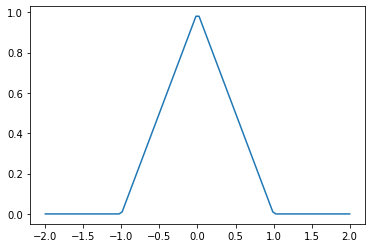

In [34]:
def hat(x):
    '''
    HAT implements the piecewise continuous hat function
    '''
    return (1 + x)*np.logical_and((-1 <= x),(x < 0)) + (1 - x)*np.logical_and((0 <= x),(x < 1))

import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
plt.plot(x, hat(x))